In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df=pd.read_csv('../Dataset/for training/4_feat_wo_fill.csv')
df['Id'] = ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0',
            '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     55 non-null     int64  
 1   age                        55 non-null     int64  
 2   5days_sleep_time_activity  55 non-null     float64
 3   5days_day_time_activity    55 non-null     float64
 4   Id                         55 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.3+ KB


In [4]:
import sklearn
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.feature_selection import RFE # recursive feature elimination

In [5]:
df.columns

Index(['gender', 'age', '5days_sleep_time_activity', '5days_day_time_activity',
       'Id'],
      dtype='object')

In [6]:
cols=['gender', 'age', '5days_sleep_time_activity',
       '5days_day_time_activity']
X=df[cols]
y=df['Id']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

#estimator = RandomForestClassifier(n_estimators=100)
estimator = GradientBoostingClassifier(n_estimators=100)

selector = RFE(estimator, n_features_to_select=2, step=1) # select 3 features
selector = selector.fit(X_train, y_train)

In [7]:
arrayselector = selector.support_.tolist()
arrayselector.append(True)
arr = np.array(arrayselector) 
arr

array([False, False,  True,  True,  True])

In [8]:
selector.ranking_

array([3, 2, 1, 1])

In [9]:
selector.n_features_

2

In [10]:
np.array(cols)[selector.support_] # convert list to numpy array and use boolean array to filter data 

array(['5days_sleep_time_activity', '5days_day_time_activity'],
      dtype='<U25')

In [11]:
sel_cols=np.array(cols)[selector.support_]
sel_cols

array(['5days_sleep_time_activity', '5days_day_time_activity'],
      dtype='<U25')

In [12]:
selector.transform(X_test)[:5] # return only selected features

array([[ 43211. , 317726. ],
       [ 10693.6, 228824. ],
       [ 23481. , 255676.4],
       [ 62504. , 480728.2],
       [ 49904.8, 398723. ]])

In [13]:
X_train_sel=pd.DataFrame(selector.transform(X_train), columns=np.array(cols)[selector.support_])
X_test_sel=pd.DataFrame(selector.transform(X_test), columns=np.array(cols)[selector.support_])

In [14]:
X_train_sel.head()

,5days_sleep_time_activity,5days_day_time_activity
0,37543.8,233625.8
1,124525.0,467588.6
2,129507.8,260240.4
3,79226.0,233218.6
4,42878.0,72237.4


In [15]:
X_test_sel.head()

,5days_sleep_time_activity,5days_day_time_activity
0,43211.0,317726.0
1,10693.6,228824.0
2,23481.0,255676.4
3,62504.0,480728.2
4,49904.8,398723.0


In [16]:
ml_df  = df.loc[:, arr]
ml_columns = ml_df.columns.to_list()


In [17]:
'''#select feature
#model= GradientBoostingClassifier(n_estimators=100, random_state=777)
model= RandomForestClassifier(n_estimators=100, random_state=777)
#model = LogisticRegression()
#model = DecisionTreeClassifier()
#model = ExtraTreesClassifier()
#model = AdaBoostClassifier()

model.fit(X_train_sel, y_train)
score=model.score(X_test_sel, y_test)
#model_scores.append([score, a[1]])
y_pred=model.predict(X_test_sel)
print(f'feature importances', model.feature_importances_) #use Logistic comment this line
print(f'X[selected features] score: {score:.04f}')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))'''

"#select feature\n#model= GradientBoostingClassifier(n_estimators=100, random_state=777)\nmodel= RandomForestClassifier(n_estimators=100, random_state=777)\n#model = LogisticRegression()\n#model = DecisionTreeClassifier()\n#model = ExtraTreesClassifier()\n#model = AdaBoostClassifier()\n\nmodel.fit(X_train_sel, y_train)\nscore=model.score(X_test_sel, y_test)\n#model_scores.append([score, a[1]])\ny_pred=model.predict(X_test_sel)\nprint(f'feature importances', model.feature_importances_) #use Logistic comment this line\nprint(f'X[selected features] score: {score:.04f}')\nprint(metrics.confusion_matrix(y_test, y_pred))\nprint(metrics.classification_report(y_test, y_pred))"

In [18]:
'''fs=pd.Series(model.feature_importances_, index=X_train_sel.columns).sort_values(ascending=True)
fs'''

'fs=pd.Series(model.feature_importances_, index=X_train_sel.columns).sort_values(ascending=True)\nfs'

In [19]:
'''fs.plot(kind='barh');'''

"fs.plot(kind='barh');"

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

ROC Try

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import svm
import pickle
import matplotlib.pyplot as plt
print(__doc__)

Automatically created module for IPython interactive environment


In [22]:
ml_df

,5days_sleep_time_activity,5days_day_time_activity,Id
0,10693.6,228824.0,1
1,48771.2,239278.2,1
2,43211.0,317726.0,1
3,56892.4,194298.2,1
4,31303.8,200302.2,1
5,26634.2,240767.8,1
6,61643.6,335598.2,1
7,34374.2,284320.6,1
8,42992.0,203120.0,1
9,25811.0,482765.0,1


In [23]:
cols=['gender', 'age', '5days_sleep_time_activity',
       '5days_day_time_activity']
X=df[cols]
y=df['Id']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

#estimator = RandomForestClassifier(n_estimators=100)
estimator = GradientBoostingClassifier(n_estimators=100)

selector = RFE(estimator, n_features_to_select=2, step=1) # select 3 features
selector = selector.fit(X_train, y_train)

arrayselector = selector.support_.tolist()
arrayselector.append(True)
arr = np.array(arrayselector) 
sel_cols=np.array(cols)[selector.support_]
sel_cols
X_train_sel=pd.DataFrame(selector.transform(X_train), columns=np.array(cols)[selector.support_])
X_test_sel=pd.DataFrame(selector.transform(X_test), columns=np.array(cols)[selector.support_])

ml_df  = df.loc[:, arr]
ml_columns = ml_df.columns.to_list()

[10693.6, 228824.0]
[48771.2, 239278.2]
[43211.0, 317726.0]
[56892.4, 194298.2]
[31303.8, 200302.2]
[26634.2, 240767.8]
[61643.6, 335598.2]
[34374.2, 284320.6]
[42992.0, 203120.0]
[25811.0, 482765.0]
[50147.0, 153494.6]
[34576.6, 228420.4]
[62330.8, 291661.6]
[42878.0, 72237.4]
[42016.2, 164387.4]
[17938.8, 397321.0]
[24344.6, 85835.4]
[40038.4, 64142.0]
[17014.0, 189703.4]
[10301.8, 84496.8]
[4627.0, 91568.8]
[18023.6, 183974.4]
[29581.2, 235831.4]
[62703.4, 257546.4]
[51929.0, 475113.4]
[34742.8, 347817.0]
[23481.0, 255676.4]
[49904.8, 398723.0]
[103205.0, 431101.8]
[115329.4, 479807.0]
[124525.0, 467588.6]
[19149.8, 169119.2]
[35635.0, 293293.2]
[37543.8, 233625.8]
[30825.2, 227922.0]
[28298.2, 246814.8]
[97899.4, 471340.6]
[64710.4, 373257.6]
[50966.2, 343819.2]
[54870.4, 304521.0]
[54821.6, 327886.0]
[79226.0, 233218.6]
[62504.0, 480728.2]
[129507.8, 260240.4]
[41799.6, 326000.6]
[43280.4, 249467.8]
[65133.6, 584654.0]
[67783.8, 462165.4]
[111668.2, 464377.6]
[84647.2, 331799.6]
[

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_c

====================Fold 2==================== 

accuracy_score : 0.6666666666666666
log_loss : 1.3842645208811817

====================Fold 3==================== 

accuracy_score : 0.6666666666666666
log_loss : 1.2093839387188081

====================Fold 4==================== 

accuracy_score : 0.5555555555555556
log_loss : 1.9570520326212442

====================Fold 5==================== 

accuracy_score : 0.5
log_loss : 1.1244469512453972



C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


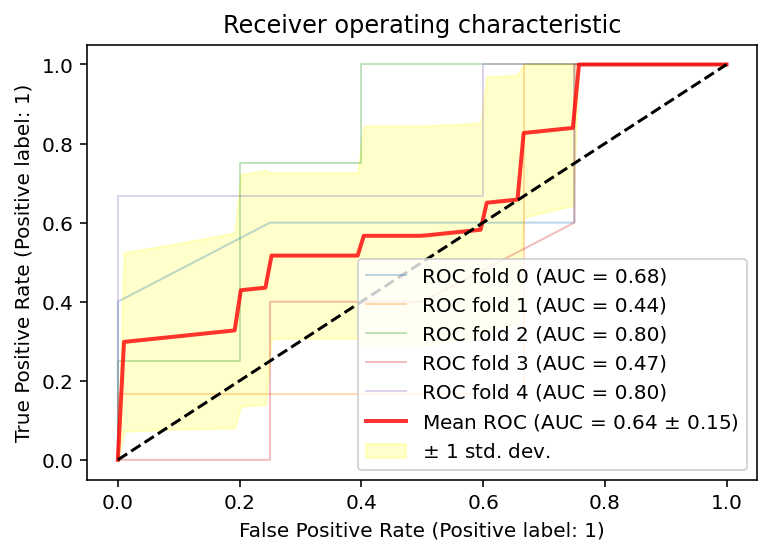

accuracy : 0.7272727272727273
=========================Fold 1=========================
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.57      0.80      0.67         5

    accuracy                           0.56         9
   macro avg       0.54      0.53      0.50         9
weighted avg       0.54      0.56      0.52         9

=========================Fold 2=========================
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.71      0.83      0.77         6

    accuracy                           0.67         9
   macro avg       0.61      0.58      0.58         9
weighted avg       0.64      0.67      0.65         9

=========================Fold 3=========================
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.60      0.75   

In [24]:
ml_df  = df.loc[:, arr]

g_features = []
g_target = []
count  = 0
count_g = 0
count_o = 0

'''for i in range(len(ml_df["Id"])):
    
    if ml_df["Id"][i] == "1":
        g_target.append(1)
        g_features.append([ ml_df["5days_sleep_time_activity"][i], ml_df["5days_day_time_activity"][i]])
    
    elif ml_df["Id"][i] == "0":
        g_target.append(0)
        g_features.append([ ml_df["5days_sleep_time_activity"][i], ml_df["5days_day_time_activity"][i]])'''

for i in range(len(ml_df["Id"])):
    arr = [ml_df[ml_columns[j]][i] for j in range(len(ml_columns) - 1)]
    print(arr)
    if ml_df["Id"][i] == "1":
        g_target.append(1)
        g_features.append([ml_df[ml_columns[j]][i] for j in range(len(ml_df.columns.to_list()) - 1)])
  
    elif ml_df["Id"][i] == "0":
        g_target.append(0)
        g_features.append([ml_df[ml_columns[j]][i] for j in range(len(ml_df.columns.to_list()) - 1)])
            
    
print(f'Select: {len(g_features)} set')
g_features = np.array(g_features)
g_target = np.array(g_target)

print(g_features)
print(g_target)


X = g_features
y = g_target


# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)


classifier = GradientBoostingClassifier(n_estimators=100,  random_state=0).fit(X_train, y_train)
history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):

    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    classifier.fit(X_train, y_train)

    # # Save model
    # with open('filter/models/svm_activity', 'wb') as f:
    #     pickle.dump(classifier, f)

    # Predict
    predict = classifier.predict(X_val)
    clf_probs = classifier.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="r",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="yellow",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)


ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
# plt.savefig(
#     'filter/graph/svm_activity_graph.jpg')
plt.show()


predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")


for i in range(len(history)):
    print(f'=========================Fold {i+1}=========================')
    print(history[i])

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.50      0.67      0.57         3

    accuracy                           0.73        11
   macro avg       0.68      0.71      0.69        11
weighted avg       0.76      0.73      0.74        11

specificity: 0.75

sensitivity: 0.6666666666666666

accuracy : 0.7272727272727273



C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


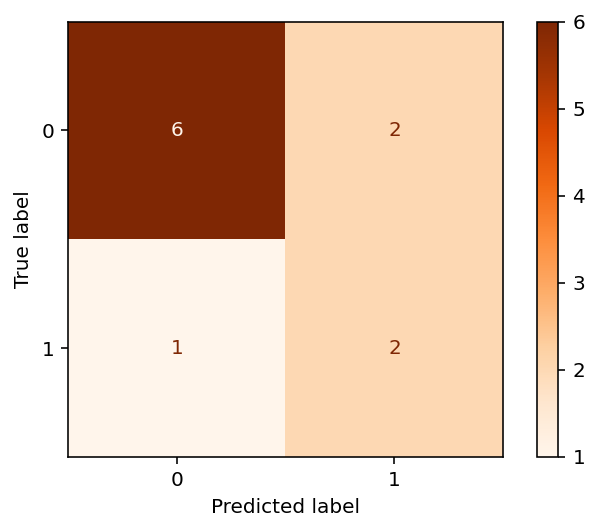

In [25]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Report
predict = classifier.predict(X_test)
print(classification_report(y_test, predict))

predict = classifier.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
print(f"specificity: {specificity}\n")
print(f"sensitivity: {sensitivity}\n")
print(f"accuracy : {accuracy_score(y_test, predict)}\n")

# Plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap='Oranges')
plt.savefig(
    '..\\Modeling\\filter\\matrix\\knn_activity_matrix.jpg')
